In [1]:
## importing needed packages -- if something stops working uncomment and run
!pip install astroquery
!pip install emcee
!pip install multiprocess
!pip install galpy
!pip install corner
#!pip install fig_code

     |████████████████████████████████| 4.5 MB 31.2 MB/s 
     |████████████████████████████████| 802 kB 31.0 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 3.6 MB 63.6 MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=f561cfdfd5d9c02ccdc0cfd120881ee55319ea039271cf12d6e00df19843ba6d
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built mimeparse
     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 6.0 MB 27.7 MB/s 


In [2]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.signal as signal
from astropy.io import fits
#from astroquery.vizier import Vizier
import pandas as pd
import numpy.random as random
#import emcee
#import corner
import random
import math as math
from math import cos, sin
from astropy.coordinates import SkyCoord
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#import fig_code
#from fig_code import visualize_tree, plot_tree_interactive
from sklearn.tree import DecisionTreeClassifier            # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split       # Import train_test_split function
from sklearn import metrics                                #Import scikit-learn metrics module for accuracy calculation

In [3]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 256 kB 27.3 MB/s 


In [4]:
plt.style.use('seaborn')
!apt-get -qq install -y fig_code && pip install fig_code
import warnings
warnings.filterwarnings('ignore')
# import fig_code
# fig_code.plot_example_decision_tree()

E: Unable to locate package fig_code


Accuracy: 0.9809322033898306
HYADES


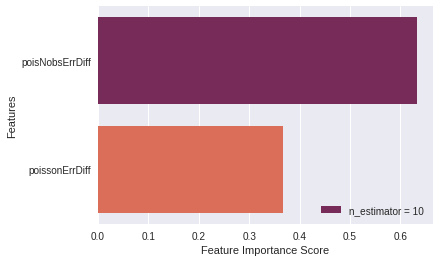

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#CRITERA FOR THE RANDOM FOREST:
#proper motion
#rotation periods
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

data = pickle.load(open("finalHyadesSet.pkl", "rb"))
#data[np.isnan(data)] = 0
#for i in range(len(data[:,0])):
#  set(data[:,i][~np.isnan(data[:,i])])


#X = data[["RA","DEC","pmra","pmdec",	"plx","gmagFlux",	"gmagFluxErr",	"gmagNobs",	"expectedPoissonErr",	"expectedPoisNobsErr", "poissonErrDiff",	"poisNobsErrDiff"]] # Star Features
X = data[["poissonErrDiff",	"poisNobsErrDiff"]]
y = data['Membership']  # Star Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) #splitting data into training, test sets

clf    = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("HYADES")

import seaborn as sns
%matplotlib inline
# Creating a bar plot
#feature_names = ["RA","DEC","pmra","pmdec",	"plx","gmagFlux",	"gmagFluxErr",	"gmagNobs",	"expectedPoissonErr",	"expectedPoisNobsErr", "poissonErrDiff",	"poisNobsErrDiff"]
feature_names = ["poissonErrDiff",	"poisNobsErrDiff"]
feature_imp = pd.Series(clf.feature_importances_, index = feature_names).sort_values(ascending=False)
feature_imp
sns.barplot(x = feature_imp, y = feature_imp.index,palette="rocket", label = "n_estimator = 10")
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
#plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Accuracy: 0.9994980808975494
PLEIADES


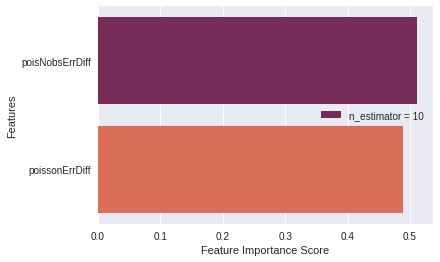

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#CRITERA FOR THE RANDOM FOREST:
#proper motion
#rotation periods
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

data = pickle.load(open("finalPleiadesSet.pkl", "rb"))
#data[np.isnan(data)] = 0
#for i in range(len(data[:,0])):
#  set(data[:,i][~np.isnan(data[:,i])])

X = data[["poissonErrDiff",	"poisNobsErrDiff"]]
#X = data[["RA","DEC","pmra","pmdec",	"plx","gmagFlux",	"gmagFluxErr",	"gmagNobs",	"expectedPoissonErr",	"expectedPoisNobsErr", "poissonErrDiff",	"poisNobsErrDiff"]] # Star Features
y = data['Membership']  # Star Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) #splitting data into training, test sets

clf    = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("PLEIADES")

import seaborn as sns
%matplotlib inline
# Creating a bar plot
#feature_names = ["RA","DEC","pmra","pmdec",	"plx","gmagFlux",	"gmagFluxErr",	"gmagNobs",	"expectedPoissonErr",	"expectedPoisNobsErr", "poissonErrDiff",	"poisNobsErrDiff"]
feature_names = ["poissonErrDiff",	"poisNobsErrDiff"]
feature_imp = pd.Series(clf.feature_importances_, index = feature_names).sort_values(ascending=False)
feature_imp
sns.barplot(x = feature_imp, y = feature_imp.index, palette="rocket",label =  "n_estimator = 10")
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
#plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#pleiades with flux(5), without (10)

In [ ]:
data = pickle.load(open("finalHyadesSet.pkl", "rb"))
data

,RA,DEC,pmra,pmdec,plx,gmagFlux,gmagFluxErr,gmagNobs,expectedPoissonErr,expectedPoisNobsErr,Membership,poissonErrDiff,poisNobsErrDiff
0,28.336420,23.444761,210.589996,-9.170000,23.650000,4.121955e+05,244.732208,182.0,642.024536,47.590027,1,-397.292358,197.142181
1,29.172892,30.476345,211.990005,-13.180000,23.870001,1.625958e+04,10.107201,195.0,127.513039,9.131398,1,-117.405838,0.975802
2,30.597960,37.496319,246.539993,-37.750000,28.100000,1.301937e+05,117.670265,215.0,360.823639,24.607967,1,-243.153366,93.062294
3,32.806900,20.972853,258.380005,-13.080000,29.969999,2.678869e+04,19.215439,180.0,163.672501,12.199429,1,-144.457062,7.016010
4,32.846451,21.377348,275.079987,-11.750000,31.900000,2.549353e+07,15034.199219,183.0,5049.111816,373.241089,1,9985.087891,14660.958008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,78.611702,34.380989,2.361205,-6.011450,0.451837,3.984241e+02,0.971833,422.0,19.960564,0.971665,0,-18.988729,0.000168
1568,86.954445,23.592710,0.120132,-3.302779,0.743092,2.569508e+05,68.819939,405.0,506.903137,25.188221,0,-438.083191,43.631718
1569,85.147247,29.859201,-0.392087,-0.318495,-0.502073,1.328291e+02,0.816131,317.0,11.525148,0.647317,0,-10.709018,0.168814
1570,42.245438,49.470097,1.355665,-0.779477,0.549813,2.999610e+03,2.115602,247.0,54.768700,3.484849,0,-52.653099,-1.369247


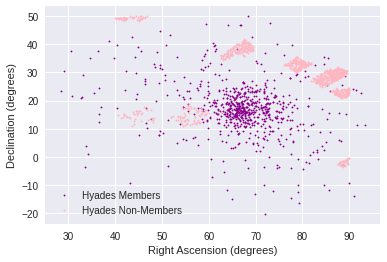

In [ ]:
import csv
import numpy as np
def read_in(file = ''):
    csvfile = open(file, newline = '')
    #get the data from any csv
    data = csv.reader(csvfile)
    ra0  = []
    dec0 = []
    pmra0  = []
    pmdec0 = []
    #skip first line = header 
    skippeddata = iter(data)
    next(skippeddata)

    for row in skippeddata:
        ra = row[2]
        ra = float(ra)
        ra0.append(ra)
        
        dec = row[3]
        dec = float(dec)
        dec0.append(dec)

        pmra = row[21]
        pmra = float(pmra)
        pmra0.append(pmra)
        
        pmdec = row[22]
        pmdec = float(pmdec)
        pmdec0.append(pmdec)
        
    a = np.array(ra0)
    b = np.array(dec0)
    c = np.array(pmra0)
    d = np.array(pmdec0)
    
    return a, b, c, d

#ra, dec, pmra, pmdec = read_in(file = 'barber_format.csv')

#PM = []
#for i in range(len(ra)): 
#  propermotion = np.sqrt(dec[i]**2 + ra[i]**2*(np.cos(dec[i])**2))
  #print(propermotion)
#  PM.append(propermotion)

#PM = np.array(PM)


data = pd.read_pickle("hyadesMembers.pkl")
data0 = pd.read_pickle("hyadesNonMembers.pkl")
data1 = pd.read_pickle("hyadesNonMembersBigSet.pkl")
plt.figure(1)
plt.scatter(data["RA"],data["DEC"], s = 2.0, label = "Hyades Members", c = "darkmagenta")
#plt.scatter(data0["RA"],data0["DEC"],s=2.0, label = "Hyades Non-Members")
plt.scatter(data1["RA"],data1["DEC"],s=2.0, label = "Hyades Non-Members", c = "lightpink")
#plt.title("Right Ascension and Declination of Unknown Association")
plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")
plt.legend()
plt.show()
#print("\n")
#plt.figure()
#plt.scatter(pmra, pmdec, s = 2.0)
#plt.xlabel("mu alpha")
#plt.ylabel("mu delta")
#plt.show()

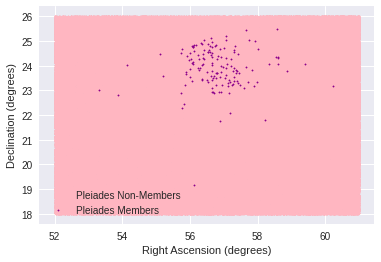

In [ ]:
data = pickle.load(open("finalPleiadesSet.pkl", "rb"))
data = pd.DataFrame(data)

data.head()


ra  = data["RA"]
dec = data["DEC"]
mem = data["Membership"]

ranon     = ra[np.where(mem == 0)[0]]
decnon    = dec[np.where(mem == 0)[0]]
ramem     = ra[np.where(mem == 1)[0]] 
decmem    = dec[np.where(mem == 1)[0]]

plt.figure(1)
plt.scatter(ranon,decnon, s = 2.0, label = "Pleiades Non-Members", c = "lightpink")
#plt.scatter(data0["RA"],data0["DEC"],s=2.0, label = "Hyades Non-Members")
plt.scatter(ramem,decmem,s=2.0, label = "Pleiades Members", c = "darkmagenta")
#plt.title("Right Ascension and Declination of Unknown Association")
plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")
plt.legend()
plt.show()

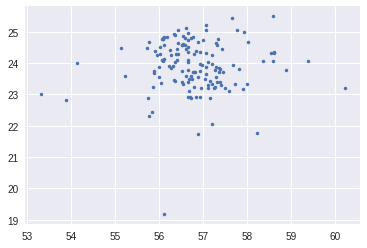

In [ ]:
#for i in data: 
#  u = np.random.rand(1)
#  if mem[i] == 0: 
#    if u < 0.5: 
 #     plt.plot(ranon, decnon)
plt.plot(ramem, decmem, '.')
plt.show()